In [35]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

from dnn_app_utils_v4 import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

#np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
#Load data
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


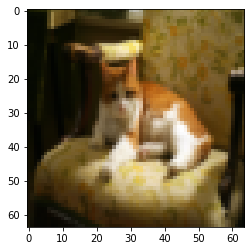

In [37]:
# Example of a picture
index = 7
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [38]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [39]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [40]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

In [46]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2501, learning_rate = 0.0075, lambd=0.5, initialization = "he")

Initialization He
Cost after iteration 0: 1.293196
Cost after iteration 100: 0.758862
Cost after iteration 200: 0.747022


KeyboardInterrupt: 

In [103]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [104]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


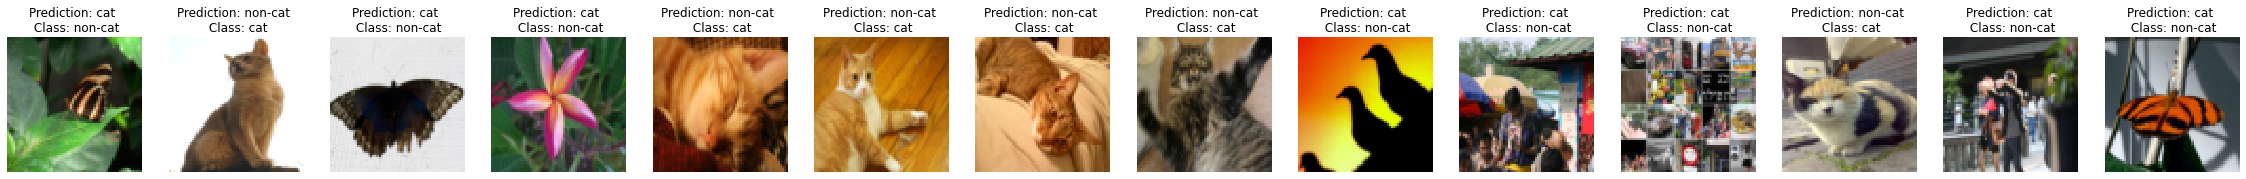

In [76]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

Cost after iteration 0: 0.079388
Cost after iteration 100: 0.075187
Cost after iteration 200: 0.071318
Cost after iteration 300: 0.068319
Cost after iteration 400: 0.065882
Cost after iteration 500: 0.064095
The total training time is 17.330647230148315 seconds


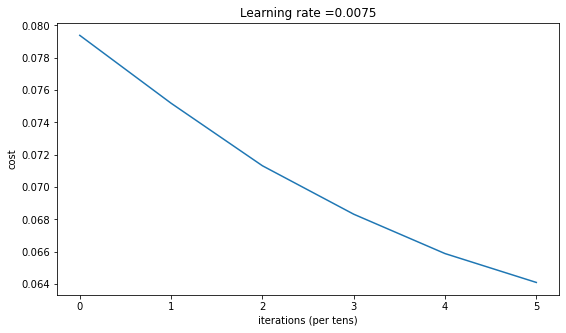

In [81]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 501, parameters = parameters)

In [82]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9904306220095691


In [83]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.76


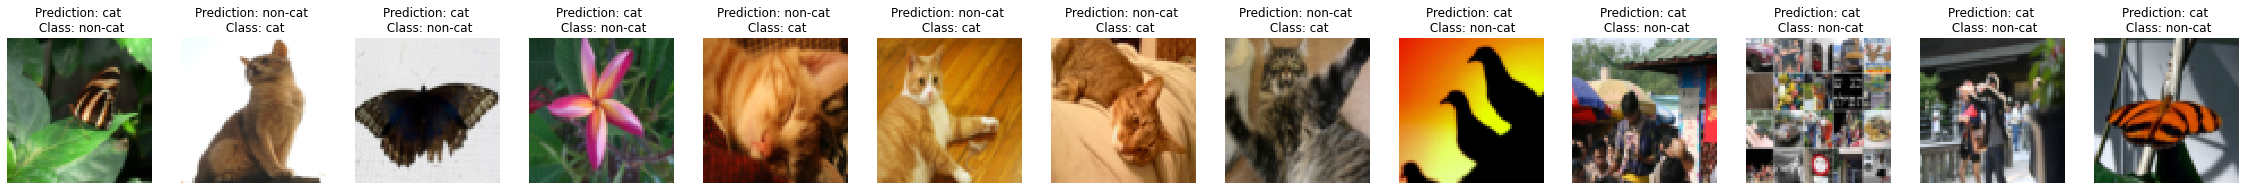

In [80]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


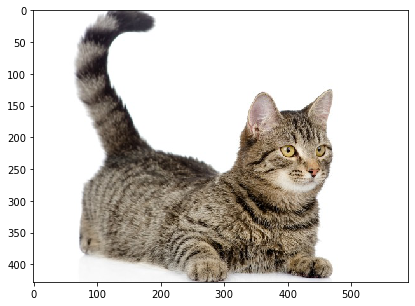

In [84]:
from PIL import Image
my_image = "my_image3.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

# open image
fname = "images/" + my_image
image = Image.open(fname)

# resize image
resized_image = image.resize((num_px, num_px))

# convert image to numpy array
my_image = np.asarray(resized_image).reshape((num_px*num_px*3,1))

my_predicted_image = predict(my_image, my_label_y, parameters)

plt.figure(figsize=(9,5))
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")